In [1]:
### Importing basic librarties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [3]:
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


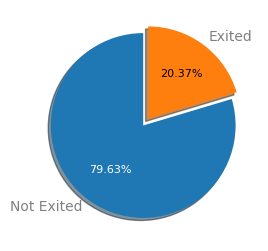

In [6]:
values = dataset.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

So, 20% of the customers have churned in the dataset.

e:\GitHub_Repos\Projects\ChurnModelling_ANN\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\GitHub_Repos\Projects\ChurnModelling_ANN\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\GitHub_Repos\Projects\ChurnModelling_ANN\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

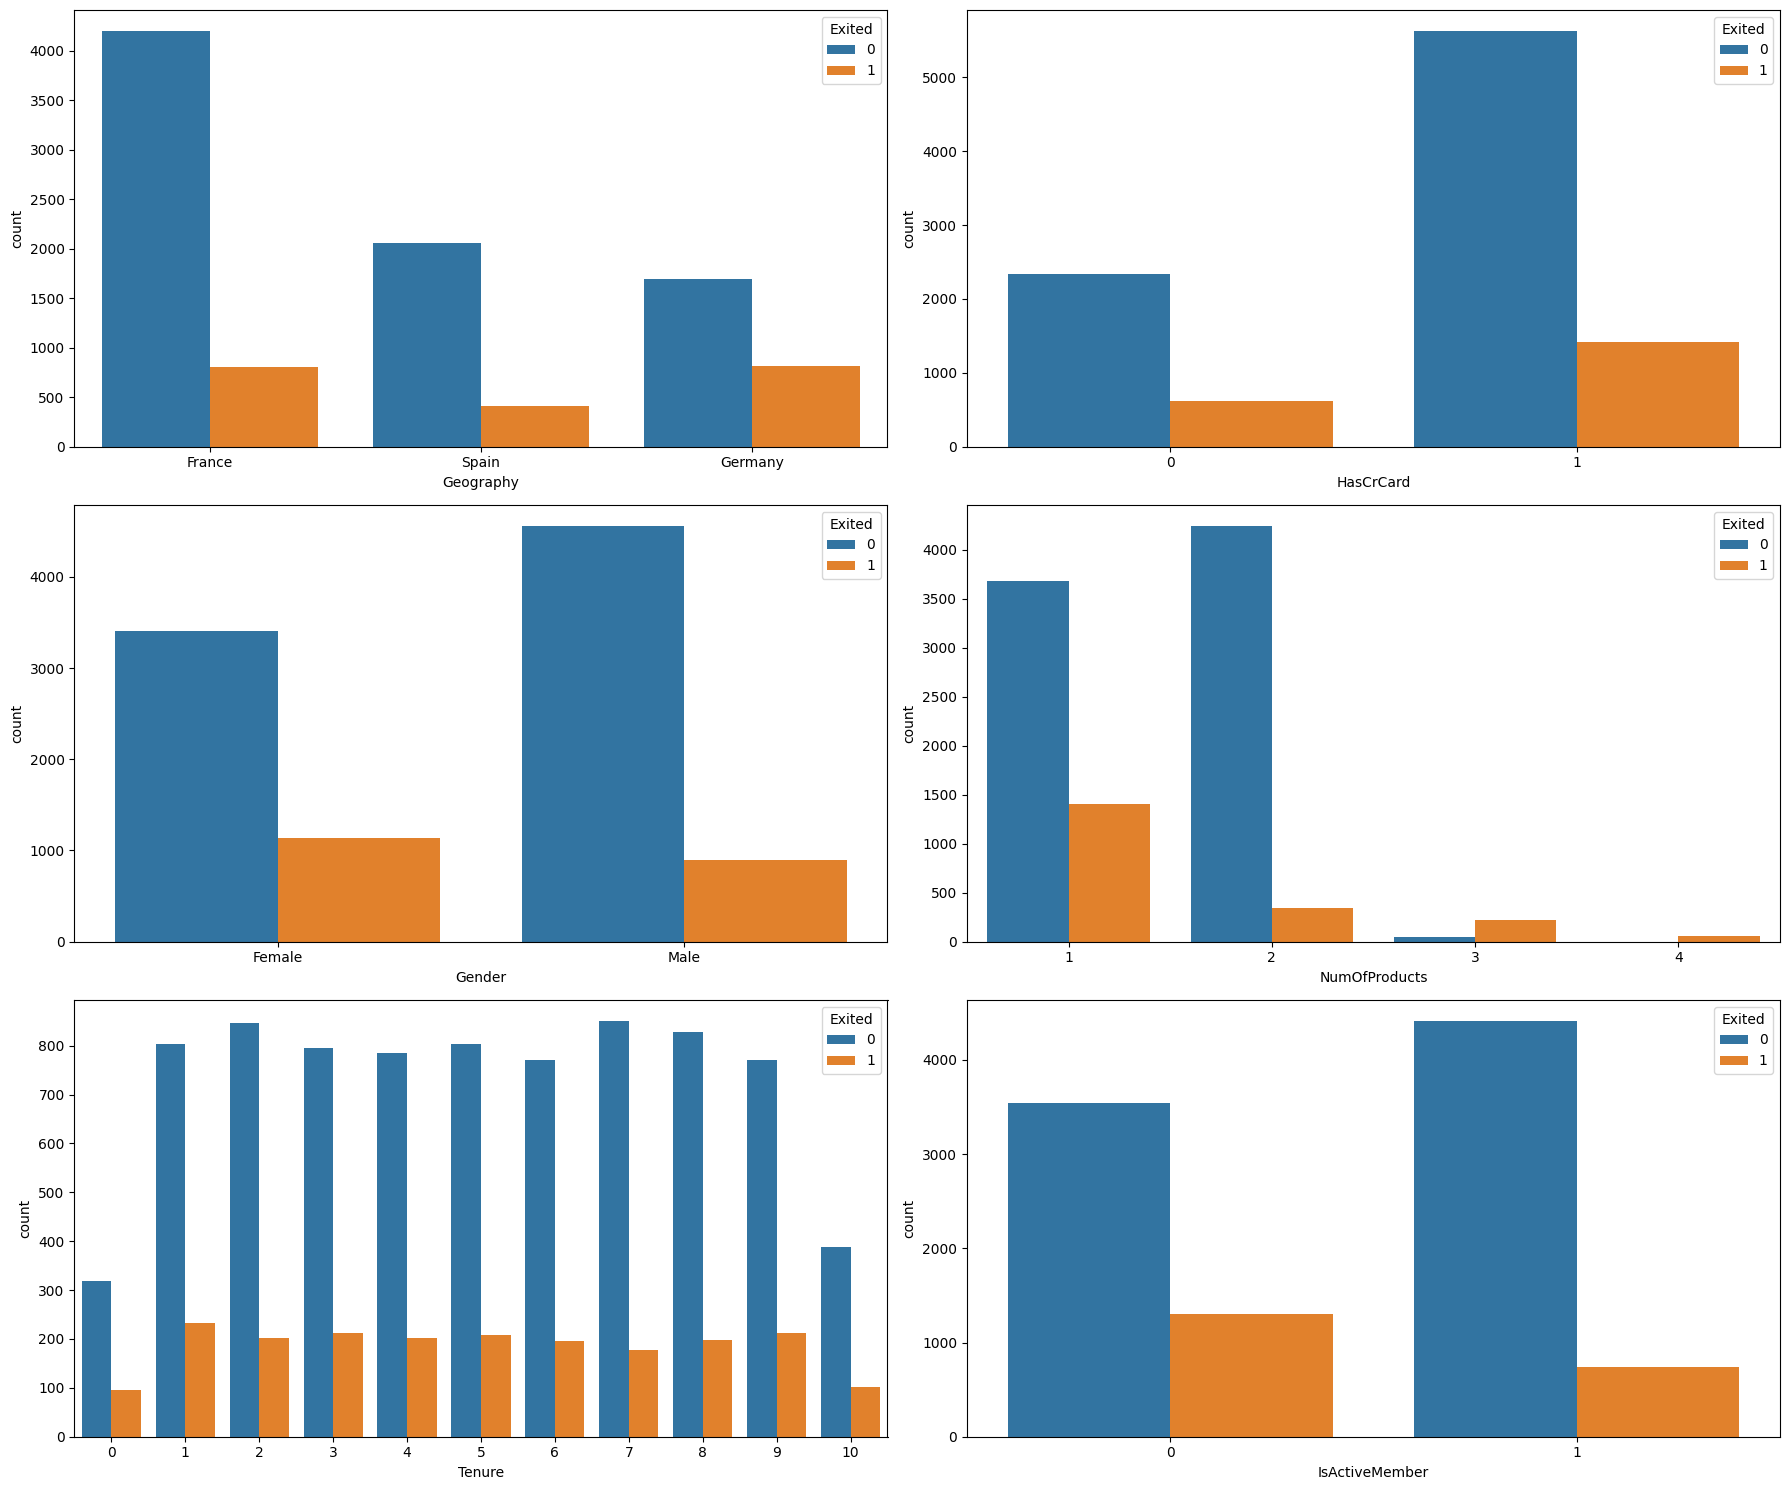

In [7]:
# visualizing categorical variables

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = dataset, ax = ax[0][0])
sns.countplot('HasCrCard', hue = 'Exited', data = dataset, ax = ax[0][1])
sns.countplot('Gender', hue = 'Exited', data = dataset, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = dataset, ax = ax[1][1])
sns.countplot('Tenure', hue = 'Exited', data = dataset, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = dataset, ax = ax[2][1])

plt.tight_layout()
plt.show()

So, The proportion of female customers churning is also greater than that of female customers. Majority of customers have tenure between 1 to 9 and churing rate is also high between these tenures. Also, majority of customers that churned are those with credit cards but this can be a coincidence as majority of customers have credit cards. Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.

Lets plot the corrplot to get unimportant columns

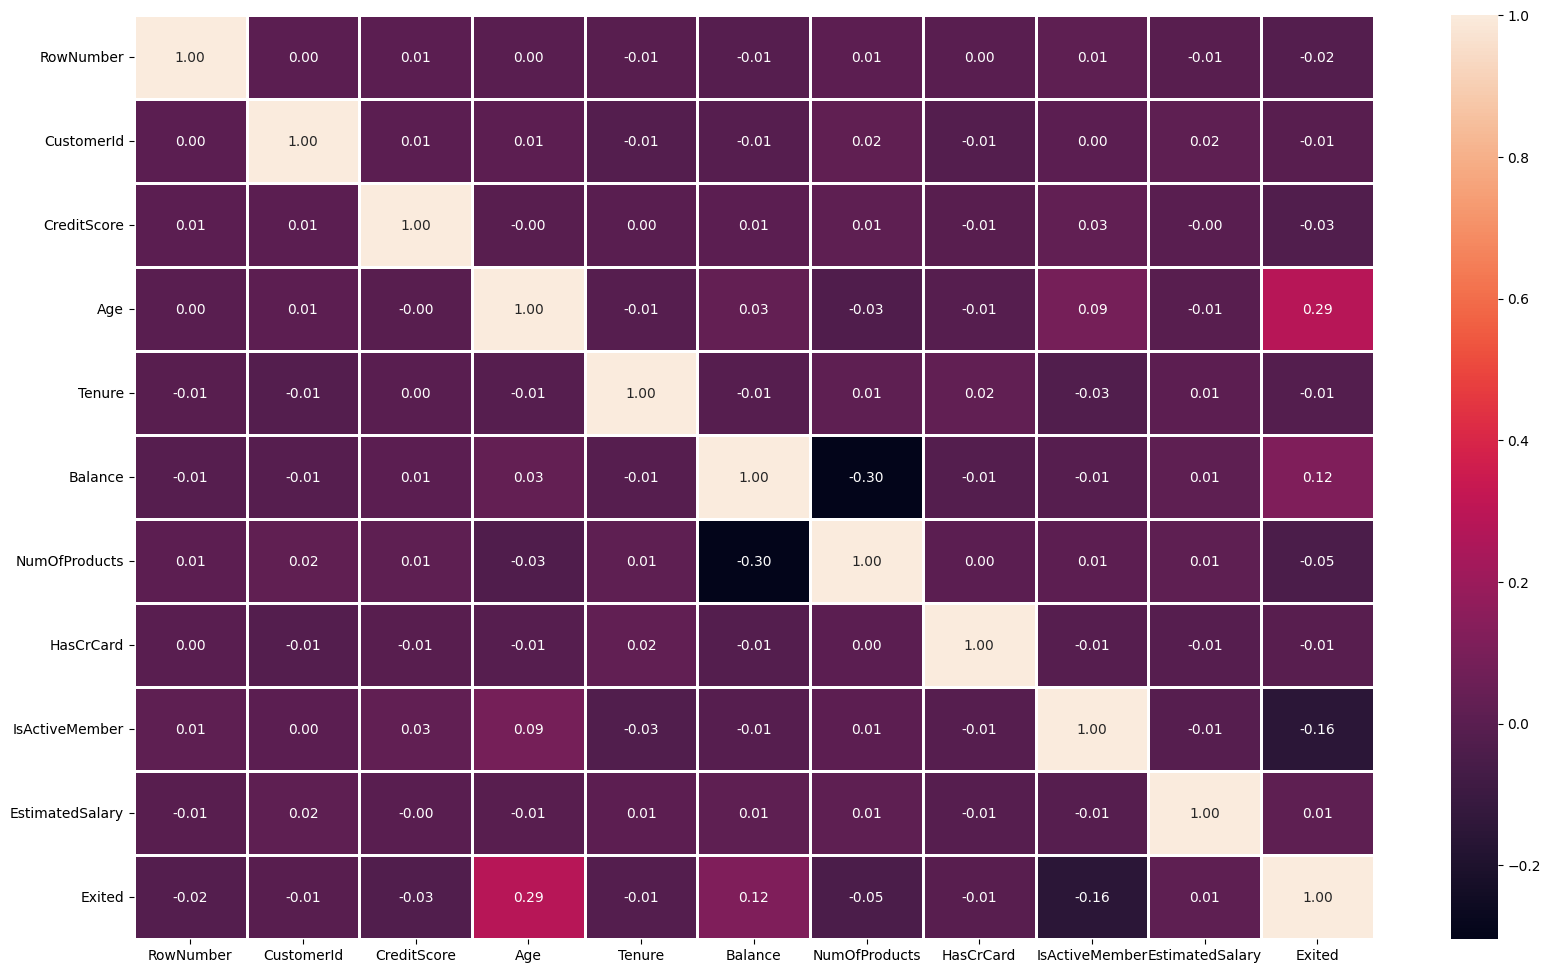

In [8]:
plt.figure(figsize = (20, 12))
corr = dataset.corr()
sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [9]:
## division of dataset into independent and dependetn features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [10]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first = True)
geography.head()


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [11]:
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [12]:
## concatenation
X = X.drop(['Geography','Gender'], axis = 1)
X = pd.concat([X,geography,gender], axis = 1)

In [13]:
# Splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [14]:
#feauture scaling
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_train.shape

(8000, 11)

## Building ANN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [19]:
### inittialize the ANN
classifier = Sequential()

## add input layers
classifier.add(Dense(units = 11, activation = 'relu'))

In [20]:
## adding the hidden layers
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))

In [21]:
## addding output layers
classifier.add(Dense(units = 1, activation='sigmoid'))

In [22]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01) ## manual learningrate of the optimizer
classifier.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
## early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [24]:
model_history = classifier.fit(X_train,y_train, validation_split=0.15, batch_size=10, epochs = 1000, callbacks = early_stopping) 

Epoch 1/1000
680/680 [==============================] - 3s 3ms/step - loss: 0.4384 - accuracy: 0.8072 - val_loss: 0.3867 - val_accuracy: 0.8367
Epoch 2/1000
680/680 [==============================] - 2s 3ms/step - loss: 0.3728 - accuracy: 0.8468 - val_loss: 0.3580 - val_accuracy: 0.8550
Epoch 3/1000
680/680 [==============================] - 2s 3ms/step - loss: 0.3590 - accuracy: 0.8518 - val_loss: 0.3526 - val_accuracy: 0.8617
Epoch 4/1000
680/680 [==============================] - 2s 3ms/step - loss: 0.3545 - accuracy: 0.8557 - val_loss: 0.3545 - val_accuracy: 0.8575
Epoch 5/1000
680/680 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.8574 - val_loss: 0.3468 - val_accuracy: 0.8583
Epoch 6/1000
680/680 [==============================] - 2s 3ms/step - loss: 0.3509 - accuracy: 0.8538 - val_loss: 0.3479 - val_accuracy: 0.8617
Epoch 7/1000
680/680 [==============================] - 2s 3ms/step - loss: 0.3492 - accuracy: 0.8574 - val_loss: 0.3486 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

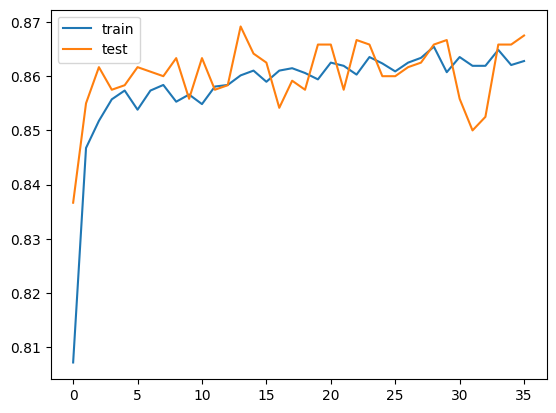

In [27]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'])

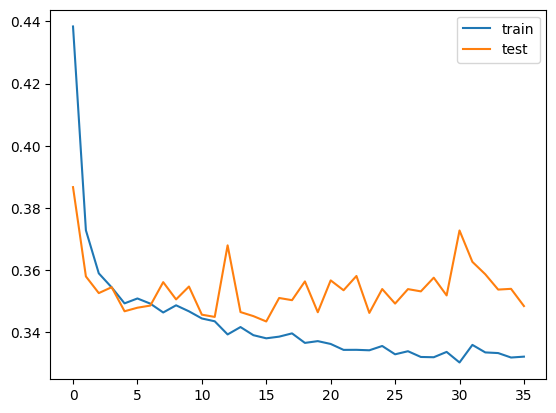

In [28]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['train', 'test'])

In [29]:
### Making the predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [30]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1542,   53],
       [ 234,  171]], dtype=int64)

In [31]:
## accurcay
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8565